In [39]:
!pip install geopy
!pip install tqdm
!pip install geocoder

In [40]:
# Import pandas
import pandas as pd
import geocoder as gc
from tqdm import tqdm
#from geopy.geocoders import Nominatim
#from geopy.distance import vincenty

# Import BoxPlot, output_notebook, and show from bokeh.charts
from bokeh.charts import BoxPlot, Donut, Bar, Histogram, output_notebook, show
from bokeh.charts.attributes import cat, color
from bokeh.charts.operations import blend
from bokeh.layouts import gridplot, row
from bokeh.models import HoverTool
from bokeh.models.widgets import Panel, Tabs
from bokeh.plotting import ColumnDataSource


In [41]:
# Assign spreadsheet filename: file
file = 'imd_student_blind.xlsx'

# Load spreadsheet: xl
xl = pd.ExcelFile(file)

# Print sheet names
print(xl.sheet_names)

['Sheet1']


In [42]:
# Load a sheet into a DataFrame by index: df
df = xl.parse(0)

# Print the head of the DataFrame df
df.head()

,a_ID,CEP,ano_ingresso,periodo_ingresso,status,ano_disciplina,periodo_disciplina,nota,disciplina_ID,status.disciplina
0,0,59015430,2014,1,CANCELADO,2014,2,2.6,0,Reprovado
1,0,59015430,2014,1,CANCELADO,2015,1,8.0,0,Aprovado
2,1,59073120,2014,1,CANCELADO,2014,2,0.1,0,Reprovado
3,2,59072580,2014,1,ATIVO,2014,2,6.1,0,Aprovado
4,3,59088150,2014,1,ATIVO,2014,1,3.0,0,Reprovado


In [43]:
df.columns

Index(['a_ID', 'CEP', 'ano_ingresso', 'periodo_ingresso', 'status',
       'ano_disciplina', 'periodo_disciplina', 'nota', 'disciplina_ID',
       'status.disciplina'],
      dtype='object')

In [44]:
df.shape

(4842, 10)

In [45]:
#Cópia por valores, não mexer no DF principal
disciplinas = df.copy()

disciplinas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4842 entries, 0 to 4841
Data columns (total 10 columns):
a_ID                  4842 non-null int64
CEP                   4842 non-null int64
ano_ingresso          4842 non-null int64
periodo_ingresso      4842 non-null int64
status                4842 non-null object
ano_disciplina        4842 non-null int64
periodo_disciplina    4842 non-null int64
nota                  4842 non-null float64
disciplina_ID         4842 non-null int64
status.disciplina     4842 non-null object
dtypes: float64(1), int64(7), object(2)
memory usage: 416.1+ KB


In [46]:
disciplinas.columns.values.tolist()

['a_ID',
 'CEP',
 'ano_ingresso',
 'periodo_ingresso',
 'status',
 'ano_disciplina',
 'periodo_disciplina',
 'nota',
 'disciplina_ID',
 'status.disciplina']

In [47]:
#Retira informações desnecessárias para essa análise

disciplinas.drop(disciplinas.columns[0:4], axis=1, inplace=True)

In [48]:
#Objetivo 1 -> Média da disciplina X por período e ano
#Objetivo 2 -> Taxa de trancamento e cancelamento por período e ano
disciplinas.columns.values.tolist()

['status',
 'ano_disciplina',
 'periodo_disciplina',
 'nota',
 'disciplina_ID',
 'status.disciplina']

In [49]:
disciplinas = disciplinas[disciplinas['status'] == 'ATIVO']
disciplinas.head()

,status,ano_disciplina,periodo_disciplina,nota,disciplina_ID,status.disciplina
3,ATIVO,2014,2,6.1,0,Aprovado
4,ATIVO,2014,1,3.0,0,Reprovado
5,ATIVO,2014,2,7.2,0,Aprovado
8,ATIVO,2014,2,8.9,0,Aprovado
12,ATIVO,2014,2,5.6,0,Aprovado


In [50]:
disciplinas_categorias =  disciplinas.groupby(['ano_disciplina', 'periodo_disciplina', 'disciplina_ID']).mean()

# convert the index to a column
disciplinas_categorias.reset_index(inplace = True )
disciplinas_categorias.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 4 columns):
ano_disciplina        42 non-null int64
periodo_disciplina    42 non-null int64
disciplina_ID         42 non-null int64
nota                  42 non-null float64
dtypes: float64(1), int64(3)
memory usage: 1.4 KB


In [51]:
disciplinas_categorias[disciplinas_categorias['disciplina_ID'] == 0]

,ano_disciplina,periodo_disciplina,disciplina_ID,nota
0,2014,1,0,5.872727
6,2014,2,0,5.625676
13,2015,1,0,6.126316
19,2015,2,0,5.486555
26,2016,1,0,4.139394
33,2016,2,0,5.750758


In [52]:
# Make a box plot: p
p = BoxPlot(disciplinas_categorias, values='nota', label='disciplina_ID', color='disciplina_ID',
             title='Distribuição da média de notas das disciplinas',
             legend='bottom_right')

# Set the y axis label
p.yaxis.axis_label='Média por período'
p.add_tools(HoverTool(tooltips=[("Nota", "$y")]))

# Call the output_notebook() 
output_notebook()
show(p)

Loading BokehJS ...

In [53]:
ps = []
#tbs = []

for atual in range(0,7):
    p = BoxPlot(disciplinas_categorias[disciplinas_categorias['disciplina_ID'] == atual], values='nota', label='periodo_disciplina',
                        color='periodo_disciplina', title='Ddisciplina '+str(atual), legend='bottom_right')
    p.yaxis.axis_label='Média por período'
    p.add_tools(HoverTool(tooltips=[("Nota", "$y")]))
    
    #temp = Panel(child=p, title='Ddisciplina '+str(atual))
    
    #tbs.append(temp)
    ps.append(p)
    
# Make a box plot: p


# Set the y axis label

grid = gridplot([ps[0:2], ps[2:4], ps[4:6], [None, ps[6]]], sizing_mode='scale_width')
#grid = gridplot([[ps[0], ps[1]], [ps[2], ps[3]], [ps[4], ps[5]], [None, ps[6]]], sizing_mode='scale_width')

#tabs = Tabs(tabs=[ tbs[0], tbs[5] ],sizing_mode='scale_width' )

#show(tabs)
# show the results
show(grid)

In [54]:
##Quantidade de alunos ativos/Trancados/cancelados/...
count_series = pd.DataFrame(columns=('Status', 'Count'))
count_series["Status"] = df["status"].unique().tolist()
tam = len(df)

for atual in range(0,len(count_series)):
    count_series.iloc[atual]["Count"] = df[df["status"] == count_series.iloc[atual]["Status"]]["status"].count()

def porcent(val):
    p = (val*100)/tam
    return p
    
graph = Donut(count_series, label="Status", values="Count", title="Situação dos alunos" )
graph.add_tools(HoverTool(tooltips=[("Alunos", str(count_series.iloc[1]["Count"])+"/"+str(tam)), #falta trocar o 1 pelo número de alunos da categoria
                                    ("Porcentagem", str(porcent(1000))) #falta trocar o 1000 pelo numero de alunos da categoria
                                   ]
                         ))

show(graph)

In [55]:
###Verificar desistência
def popula(string):
    aux = []
    for atual in range (2014, 2017):
        aux.append(df[df["ano_ingresso"] == atual][df["status"] == string]["status"].count())
    return aux

count_desist = pd.DataFrame(columns=('ANO', 'CANCELADO', 'ATIVO', 'TRANCADO', 'CONCLUIDO', 'FORMANDO', 'FORMADO'))
count_desist["ANO"] = [2014, 2015, 2016]

for atual in count_desist.columns.values:
    if atual != "ANO":
        count_desist[atual] = popula(atual)

print(count_desist)



C:\Users\nalbertg\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


    ANO  CANCELADO  ATIVO  TRANCADO  CONCLUIDO  FORMANDO  FORMADO
0  2014        584    843       112         13        38       10
1  2015        329   1530       114          7         0        0
2  2016        134   1067        56          0         5        0


In [56]:

BLEND = blend('CANCELADO', "ATIVO",  "TRANCADO",  "CONCLUIDO",  "FORMANDO",  "FORMADO",
              name='unidade', labels_name='Situacao')

bar = Bar(count_desist, values=BLEND,
          label=cat(columns='ANO', sort=False),
          stack=cat(columns='Situacao', sort=False),
          color="Situacao",
          legend='bottom_center',
          title="Índice de formação e desitencia de alunos por ano",
          ylabel = "Alunos",
          tooltips=[('Tipo', "$y")]) ##Corrigir isso também

output_notebook()

show(bar)

Loading BokehJS ...

In [57]:
###Verificar NOtas ENEM
ps = []
temp = ["nota", "enen-nota", "enem-matematica", "enem-redacao"]

for atual in range(0, len(temp)):
    p = BoxPlot(disciplinas_categorias, values=temp[atual], label='disciplina_ID',
                        color='disciplina_ID', title=str(temp[atual])+" x Desempenho em disciplinas ", legend='bottom_right')
    p.yaxis.axis_label='Média por período'
    p.add_tools(HoverTool(tooltips=[("Nota", "$y{f.fff}")]))
    
    #temp = Panel(child=p, title='Ddisciplina '+str(atual))
    
    #tbs.append(temp)
    ps.append(p)
    

grid = gridplot([ps[0:2], ps[2:4]], sizing_mode='scale_width')

output_notebook()
show(grid)

KeyError: 'enen-nota'

In [58]:
#Verificar distancias
distancias = df[df["status"] == "ATIVO"].copy()
distancias["LAT"], distancias["LON"], distancias["KM"] = [0,0,0]
distancias = distancias.reset_index()
uf = gc.google("59064741").latlng

for i in tqdm(range(0,100)): ## trocar o range por range(len(distancias))
    st = distancias.loc[i,'CEP']
    g = gc.google(st)
    if g.lat == None:
        distancias.loc[i, "LAT"] = 0
    elif g.lng == None:
        distancias.loc[i, "LON"] = 0
    else:
        distancias.loc[i, "LON"] = g.lng
        distancias.loc[i, "LAT"] = g.lat
print("Completo")

distancias.to_csv('LatLong_Alunos.csv', encoding="utf-8")
##Salva tabela criada
    
#UFRN 59064-741
distancias.head()

100%|████████████████████████████████████████| 100/100 [00:45<00:00,  2.26it/s]


Completo


,index,a_ID,CEP,ano_ingresso,periodo_ingresso,status,ano_disciplina,periodo_disciplina,nota,disciplina_ID,status.disciplina,LAT,LON,KM
0,3,2,59072580,2014,1,ATIVO,2014,2,6.1,0,Aprovado,0,0,0
1,4,3,59088150,2014,1,ATIVO,2014,1,3.0,0,Reprovado,0,0,0
2,5,3,59088150,2014,1,ATIVO,2014,2,7.2,0,Aprovado,0,0,0
3,8,5,59112430,2014,1,ATIVO,2014,2,8.9,0,Aprovado,0,0,0
4,12,7,59020330,2014,1,ATIVO,2014,2,5.6,0,Aprovado,0,0,0


In [59]:
distancias =  pd.read_csv('LatLong_Alunos.csv', encoding="utf-8", index_col=0)
    
for atual in tqdm(range(0,100)): ## trocar o range por range(len(distancias))
    lt = distancias.loc[atual, "LAT"]
    ln = distancias.loc[atual, "LON"]
    if lt != 0. and ln != 0.:
        compare = (lt, ln)
        #print(vincenty(uf, compare).km)
        distancias.loc[atual, "KM"] = vincenty(uf, compare).km
    
distancias.head()

100%|██████████████████████████████████████| 100/100 [00:00<00:00, 1080.22it/s]


,index,a_ID,CEP,ano_ingresso,periodo_ingresso,status,ano_disciplina,periodo_disciplina,nota,disciplina_ID,status.disciplina,LAT,LON,KM
0,3,2,59072580,2014,1,ATIVO,2014,2,6.1,0,Aprovado,0,0,0
1,4,3,59088150,2014,1,ATIVO,2014,1,3.0,0,Reprovado,0,0,0
2,5,3,59088150,2014,1,ATIVO,2014,2,7.2,0,Aprovado,0,0,0
3,8,5,59112430,2014,1,ATIVO,2014,2,8.9,0,Aprovado,0,0,0
4,12,7,59020330,2014,1,ATIVO,2014,2,5.6,0,Aprovado,0,0,0


In [60]:
def binSearch(array, ano, periodo, element_to_search):
    for index in range(len(array)):
        if((periodo == array[index]['PERIODO'] and ano == array[index]['ANO']) and element_to_search == array[index]['DISCIPLINA']):
            return index
    return -1

In [61]:
import copy

def catchTRA(array, tra):
    dict_model = {'ANO': '', 'PERIODO': '', 'DISCIPLINA': 0, 'NUMERO_DE_ALUNOS': 0, 'PORCENTAGEM': 0}
    anos=  [2014, 2015, 2016]
    periodos = [1, 2]
    for ano in anos:
        for periodo in periodos:
            temp_df1 = df[df['status.disciplina'] == tra]
            temp_df2 = temp_df1[temp_df1['periodo_disciplina'] == periodo]
            temp_df3 = temp_df2[temp_df2['ano_disciplina'] == ano]
            #print(temp_df2)
            for index in range(len(temp_df3)):
                disciplina = temp_df3.iloc[index]['disciplina_ID']
            
                bin_result = binSearch(array, ano, periodo, disciplina)
                if bin_result == -1:
                    temp_dict = copy.copy(dict_model)
                    temp_dict['ANO'] = ano
                    temp_dict['PERIODO'] = periodo
                    temp_dict['DISCIPLINA'] = disciplina
                    temp_dict['NUMERO_DE_ALUNOS'] = 1
                    array.append(temp_dict)
                else:
                    array[bin_result]['NUMERO_DE_ALUNOS'] += 1
    
    for index in range(len(array)):
        index_total_estudantes = df[df['ano_disciplina'] == array[index]['ANO']]
        index_total_estudantes = index_total_estudantes[index_total_estudantes['periodo_disciplina'] == array[index]['PERIODO']]
        index_total_estudantes = index_total_estudantes[index_total_estudantes['disciplina_ID'] == array[index]['DISCIPLINA']]
        index_total_estudantes = len(index_total_estudantes)
    
        array[index]['PORCENTAGEM'] = (array[index]['NUMERO_DE_ALUNOS']/index_total_estudantes) * 100

In [62]:
reprovados = []

catchTRA(reprovados, 'Reprovado')

In [63]:
aprovados = []

catchTRA(aprovados, 'Aprovado')

### Graficos de aprovados e reprovados

In [64]:
import numpy as np
import scipy.special

from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_file

def cria_graficos_barras_apro_repro(array, disciplina, titulo_grafico):
    dados = []
    
    anos=  [2014, 2015, 2016]
    periodos = [1, 2]
    
    for ano in anos:
        for periodo in periodos:
            for index in range(len(array)):
                if (array[index]['ANO'] == ano and array[index]['PERIODO'] == periodo) and array[index]['DISCIPLINA'] == disciplina:  
                    dados.append(array[index]['PORCENTAGEM'])   

    data = {
    'semestres': ['2014.1', '2014.2', '2015.1', '2015.2', '2016.1', '2016.2'],
    'porcentage': dados
}

    # table-like data results in reconfiguration of the chart with no data manipulation
    bar2 = Bar(data, values='porcentage', label=['semestres'], title=titulo_grafico, plot_width=400)

    output_file("stacked_bar.html")
    show(row(bar2))

In [65]:
cria_graficos_barras_apro_repro(aprovados, 0, 'Aprovados disciplina 0')
cria_graficos_barras_apro_repro(aprovados, 1, 'Aprovados disciplina 1')
cria_graficos_barras_apro_repro(aprovados, 2, 'Aprovados disciplina 2')
cria_graficos_barras_apro_repro(aprovados, 3, 'Aprovados disciplina 3')
cria_graficos_barras_apro_repro(aprovados, 5, 'Aprovados disciplina 5')
cria_graficos_barras_apro_repro(aprovados, 6, 'Aprovados disciplina 6')

INFO:bokeh.core.state:Session output file 'stacked_bar.html' already exists, will be overwritten.


INFO:bokeh.core.state:Session output file 'stacked_bar.html' already exists, will be overwritten.


INFO:bokeh.core.state:Session output file 'stacked_bar.html' already exists, will be overwritten.


INFO:bokeh.core.state:Session output file 'stacked_bar.html' already exists, will be overwritten.


INFO:bokeh.core.state:Session output file 'stacked_bar.html' already exists, will be overwritten.


In [66]:
cria_graficos_barras_apro_repro(reprovados, 0, 'Reprovados disciplina 0')
cria_graficos_barras_apro_repro(reprovados, 1, 'Reprovados disciplina 1')
cria_graficos_barras_apro_repro(reprovados, 2, 'Reprovados disciplina 2')
cria_graficos_barras_apro_repro(reprovados, 3, 'Reprovados disciplina 3')
cria_graficos_barras_apro_repro(reprovados, 5, 'Reprovados disciplina 5')
cria_graficos_barras_apro_repro(reprovados, 6, 'Reprovados disciplina 6')

INFO:bokeh.core.state:Session output file 'stacked_bar.html' already exists, will be overwritten.


INFO:bokeh.core.state:Session output file 'stacked_bar.html' already exists, will be overwritten.


INFO:bokeh.core.state:Session output file 'stacked_bar.html' already exists, will be overwritten.


INFO:bokeh.core.state:Session output file 'stacked_bar.html' already exists, will be overwritten.


INFO:bokeh.core.state:Session output file 'stacked_bar.html' already exists, will be overwritten.


INFO:bokeh.core.state:Session output file 'stacked_bar.html' already exists, will be overwritten.


## Preparação para determinar Correlação entre média de notas e distância até a UF

In [3]:
# Import pandas
import pandas as pd
import geocoder as gc
from tqdm import tqdm
from geopy.geocoders import Nominatim
from geopy.distance import vincenty

# Import BoxPlot, output_notebook, and show from bokeh.charts
from bokeh.charts import BoxPlot, Donut, Bar, Histogram, output_notebook, show
from bokeh.charts.attributes import cat, color
from bokeh.charts.operations import blend
from bokeh.layouts import gridplot, row
from bokeh.models import HoverTool
from bokeh.models.widgets import Panel, Tabs
from bokeh.plotting import ColumnDataSource

In [21]:
#Verificar distancias
distancias = df[df["status"] == "ATIVO"].copy()
distancias["LAT"], distancias["LON"], distancias["KM"] = [0,0,0]
distancias = distancias.reset_index()
uf = gc.google("59064741").latlng

for i in tqdm(range(len(distancias))): ## trocar o range por range(len(distancias))
    st = distancias.loc[i,'CEP']
    g = gc.google(st)
    if g.lat == None:
        distancias.loc[i, "LAT"] = 0
    elif g.lng == None:
        distancias.loc[i, "LON"] = 0
    else:
        distancias.loc[i, "LON"] = g.lng
        distancias.loc[i, "LAT"] = g.lat
print("Completo")

distancias.to_csv('LatLong_Alunos3.csv', encoding="utf-8")
##Salva tabela criada
    
#UFRN 59064-741
distancias.head()

100%|██████████████████████████████████████| 3440/3440 [30:19<00:00,  2.17it/s]


Completo


,index,a_ID,CEP,ano_ingresso,periodo_ingresso,status,ano_disciplina,periodo_disciplina,nota,disciplina_ID,status.disciplina,LAT,LON,KM
0,3,2,59072580,2014,1,ATIVO,2014,2,6.1,0,Aprovado,-5.832998,-35.242542,0
1,4,3,59088150,2014,1,ATIVO,2014,1,3.0,0,Reprovado,-5.872282,-35.206600,0
2,5,3,59088150,2014,1,ATIVO,2014,2,7.2,0,Aprovado,-5.872282,-35.206600,0
3,8,5,59112430,2014,1,ATIVO,2014,2,8.9,0,Aprovado,-5.750546,-35.258952,0
4,12,7,59020330,2014,1,ATIVO,2014,2,5.6,0,Aprovado,-5.798325,-35.202731,0


In [22]:
distancias =  pd.read_csv('LatLong_Alunos.csv', encoding="utf-8", index_col=0)

for atual in tqdm(range(len(distancias))): ## trocar o range por range(len(distancias))
    lt = distancias.loc[atual, "LAT"]
    ln = distancias.loc[atual, "LON"]
    if lt != 0. and ln != 0.:
        compare = (lt, ln)
        #print(vincenty(uf, compare).km)
        distancias.loc[atual, "KM"] = vincenty(uf, compare).km
        
distancias.to_csv('LatLong_Alunos2.csv', encoding="utf-8")    
distancias.head()

100%|████████████████████████████████████| 3440/3440 [00:01<00:00, 2229.26it/s]


,index,a_ID,CEP,ano_ingresso,periodo_ingresso,status,ano_disciplina,periodo_disciplina,nota,disciplina_ID,status.disciplina,LAT,LON,KM
0,3,2,59072580,2014,1,ATIVO,2014,2,6.1,0,Aprovado,-5.832998,-35.242542,3.451075
1,4,3,59088150,2014,1,ATIVO,2014,1,3.0,0,Reprovado,-5.872282,-35.206600,4.027258
2,5,3,59088150,2014,1,ATIVO,2014,2,7.2,0,Aprovado,-5.872282,-35.206600,4.027258
3,8,5,59112430,2014,1,ATIVO,2014,2,8.9,0,Aprovado,-5.750546,-35.258952,10.830276
4,12,7,59020330,2014,1,ATIVO,2014,2,5.6,0,Aprovado,-5.798325,-35.202731,4.301033


In [23]:
distancias

,index,a_ID,CEP,ano_ingresso,periodo_ingresso,status,ano_disciplina,periodo_disciplina,nota,disciplina_ID,status.disciplina,LAT,LON,KM
0,3,2,59072580,2014,1,ATIVO,2014,2,6.1,0,Aprovado,-5.832998,-35.242542,3.451075
1,4,3,59088150,2014,1,ATIVO,2014,1,3.0,0,Reprovado,-5.872282,-35.206600,4.027258
2,5,3,59088150,2014,1,ATIVO,2014,2,7.2,0,Aprovado,-5.872282,-35.206600,4.027258
3,8,5,59112430,2014,1,ATIVO,2014,2,8.9,0,Aprovado,-5.750546,-35.258952,10.830276
4,12,7,59020330,2014,1,ATIVO,2014,2,5.6,0,Aprovado,-5.798325,-35.202731,4.301033
5,13,8,59151610,2014,1,ATIVO,2014,2,1.5,0,Reprovado,0.000000,0.000000,0.000000
6,14,8,59151610,2014,1,ATIVO,2015,1,6.9,0,Aprovado,0.000000,0.000000,0.000000
7,21,12,59547000,2014,1,ATIVO,2014,2,2.6,0,Reprovado,-5.516642,-36.067595,101.201317
8,22,12,59547000,2014,1,ATIVO,2015,1,5.9,0,Aprovado,-5.516642,-36.067595,101.201317
9,25,14,59150500,2014,1,ATIVO,2014,2,1.2,0,Reprovado,0.000000,0.000000,0.000000


## Determinar Correlação entre média de notas e distância até a UF 
### Passo 1 - Determinar Covariância -> (Σ[(xi-xmed)*(yi-ymed)])/n-1
  
### Passo 2 - Determinar Variancia de cada variável (X,Y) 
### Passo 3 - Determinar Correlação :D


In [24]:
#Considera apenas as aprovações -> Validação 1
distancias = distancias[distancias["status.disciplina"] == 'Aprovado']

#Removendo distâncias desnecessárias -> Validação 2 e 3
distancias = distancias[distancias['KM'] != 0]
distancias = distancias[distancias['CEP'] != 0]

#Validação 4
distancias = distancias[distancias['KM'] < 20]

distancias

,index,a_ID,CEP,ano_ingresso,periodo_ingresso,status,ano_disciplina,periodo_disciplina,nota,disciplina_ID,status.disciplina,LAT,LON,KM
0,3,2,59072580,2014,1,ATIVO,2014,2,6.1,0,Aprovado,-5.832998,-35.242542,3.451075
2,5,3,59088150,2014,1,ATIVO,2014,2,7.2,0,Aprovado,-5.872282,-35.206600,4.027258
3,8,5,59112430,2014,1,ATIVO,2014,2,8.9,0,Aprovado,-5.750546,-35.258952,10.830276
4,12,7,59020330,2014,1,ATIVO,2014,2,5.6,0,Aprovado,-5.798325,-35.202731,4.301033
12,28,15,59151800,2014,1,ATIVO,2014,2,8.5,0,Aprovado,-5.890733,-35.196979,6.242204
14,36,20,59090620,2014,1,ATIVO,2014,2,6.4,0,Aprovado,-5.885479,-35.168988,7.204428
16,39,23,59070750,2014,2,ATIVO,2015,1,8.9,0,Aprovado,-5.833169,-35.231361,2.220069
17,41,25,59115685,2014,1,ATIVO,2016,1,7.3,0,Aprovado,-5.744671,-35.271933,12.132286
20,44,26,59290000,2014,1,ATIVO,2015,2,6.6,0,Aprovado,-5.776116,-35.368568,18.616898
21,45,27,59040240,2014,1,ATIVO,2014,1,5.9,0,Aprovado,-5.793517,-35.223136,4.891914


In [25]:
#Protótipo da média

#distancias2 = distancias.sort_values(['KM'], ascending=[False])
#distancias2 = distancias2[distancias2["a_ID"] == 3]

#media_teste =  distancias2['nota'].mean()

#distancias2 = distancias.sort_values(['KM'], ascending=[False])

#distancias2

In [26]:
#Lista com ID dos alunos validados
alunos_validos = distancias.a_ID.unique()
alunos_validos

array([  2,   3,   5,   7,  15,  20,  23,  25,  26,  27,  30,  31,  33,
        38,  39,  41,  47,  54,  55,  57,  60,  61,  62,  63,  64,  70,
        71,  72,  80,  83,  86,  87,  93,  95,  98, 103, 108, 110, 111,
       112, 117, 120, 123, 125, 128, 129], dtype=int64)

### Ocorrência dos dados

In [27]:
#Valores 'chave' da análise
valor_x_list = []
valor_y_list = []
for i in range(len(alunos_validos)):
    
    #Seleciona todas as ocorrências do aluno com aquele ID
    aluno = distancias[distancias["a_ID"] == alunos_validos[i]]    
    
    #Calcula média das notas para aquele aluno
    media =  aluno['nota'].mean()
    distancia_UF = aluno['KM'].mean()
    
    #Adiciona resultado à lista de distribuição X 
    if( media <= 6.0 ):
        valor_x_list.append(0)
    elif( media > 6.0 and media <= 7.0 ):
        valor_x_list.append(1)
    elif( media > 7.0 and media <= 8.0 ):
        valor_x_list.append(2)
    else:
        valor_x_list.append(3)
        
    #Adiciona resultado à lista de distribuição Y 
    if( distancia_UF <= 1.5 ):
        valor_y_list.append(0)
    elif( distancia_UF > 1.5 and distancia_UF <= 4.0 ):
        valor_y_list.append(1)
    elif( distancia_UF > 4.0 and distancia_UF <= 8.0 ):
        valor_y_list.append(2)
    else:
        valor_y_list.append(3)

## Tabela de Ocorrências

In [28]:
#Tabela de Ocorrências
distribuicao = pd.DataFrame(columns=('Valor X_Nota', 'Valor Y_Distancia', 'Xi - Xmed', 'Yi - Ymed'
                                     , 'Prod', '(Xi - Xmed)^2', '(Yi - Ymed)^2' ) )

distribuicao["Valor X_Nota"] = valor_x_list
distribuicao["Valor Y_Distancia"] = valor_y_list

distribuicao
#distancias["LAT"], distancias["LON"], distancias["KM"] = [0,0,0]

,Valor X_Nota,Valor Y_Distancia,Xi - Xmed,Yi - Ymed,Prod,(Xi - Xmed)^2,(Yi - Ymed)^2
0,1,1,NaN,NaN,NaN,NaN,NaN
1,2,2,NaN,NaN,NaN,NaN,NaN
2,3,3,NaN,NaN,NaN,NaN,NaN
3,0,2,NaN,NaN,NaN,NaN,NaN
4,3,2,NaN,NaN,NaN,NaN,NaN
5,1,2,NaN,NaN,NaN,NaN,NaN
6,3,1,NaN,NaN,NaN,NaN,NaN
7,2,3,NaN,NaN,NaN,NaN,NaN
8,1,3,NaN,NaN,NaN,NaN,NaN
9,0,2,NaN,NaN,NaN,NaN,NaN


## Executando passo 1

### Cálculo do Xmed e Ymed (Valor médio de todos os pontos de X e Y)

In [29]:
xmed =  distribuicao['Valor X_Nota'].mean()
ymed =  distribuicao['Valor Y_Distancia'].mean()

### Cálculo (Xi - Xmed) e (Yi - Ymed) i = índice dos valores de X e Y

In [30]:
dif_X = []
dif_Y = []
prod = []

for i in range(len(alunos_validos)):
    
    #Calcula diferença para cada valor de X e salva numa lista
    difX = valor_x_list[i] - xmed
    
    dif_X.append(difX)
    
    #Calcula diferença para cada valor de Y e salva numa lista
    difY = valor_y_list[i] - ymed
    
    dif_Y.append(difY)
    
    #Calcula produto entre valores
    prod_Difs = difX*difY
    
    prod.append(prod_Difs)
    
#Adiciona na tabela
distribuicao["Xi - Xmed"] = dif_X
distribuicao["Yi - Ymed"] = dif_Y
distribuicao["Prod"] = prod

In [31]:
distribuicao

,Valor X_Nota,Valor Y_Distancia,Xi - Xmed,Yi - Ymed,Prod,(Xi - Xmed)^2,(Yi - Ymed)^2
0,1,1,-0.76087,-1.086957,0.827032,NaN,NaN
1,2,2,0.23913,-0.086957,-0.020794,NaN,NaN
2,3,3,1.23913,0.913043,1.131380,NaN,NaN
3,0,2,-1.76087,-0.086957,0.153119,NaN,NaN
4,3,2,1.23913,-0.086957,-0.107750,NaN,NaN
5,1,2,-0.76087,-0.086957,0.066163,NaN,NaN
6,3,1,1.23913,-1.086957,-1.346881,NaN,NaN
7,2,3,0.23913,0.913043,0.218336,NaN,NaN
8,1,3,-0.76087,0.913043,-0.694707,NaN,NaN
9,0,2,-1.76087,-0.086957,0.153119,NaN,NaN


### Calcula a covariância

In [32]:
passo1 = distribuicao['Prod'].sum()

covXY = passo1/(len(alunos_validos)-1)
covXY

0.021256038647343007

## Executando passo 2

In [33]:
dif_X_quadrada = []
dif_Y_quadrada = []

for i in range(len(alunos_validos)):
    
    #Eleva cada diferença ao quadrado
    difX_quad = dif_X[i]*dif_X[i]
    
    dif_X_quadrada.append(difX_quad)
    
    #Eleva cada diferença ao quadrado
    difY_quad = dif_Y[i]*dif_Y[i]
    
    dif_Y_quadrada.append(difY_quad)
    
#Adiciona na tabela
distribuicao["(Xi - Xmed)^2"] = dif_X_quadrada
distribuicao["(Yi - Ymed)^2"] = dif_Y_quadrada

In [34]:
distribuicao

,Valor X_Nota,Valor Y_Distancia,Xi - Xmed,Yi - Ymed,Prod,(Xi - Xmed)^2,(Yi - Ymed)^2
0,1,1,-0.76087,-1.086957,0.827032,0.578922,1.181474
1,2,2,0.23913,-0.086957,-0.020794,0.057183,0.007561
2,3,3,1.23913,0.913043,1.131380,1.535444,0.833648
3,0,2,-1.76087,-0.086957,0.153119,3.100662,0.007561
4,3,2,1.23913,-0.086957,-0.107750,1.535444,0.007561
5,1,2,-0.76087,-0.086957,0.066163,0.578922,0.007561
6,3,1,1.23913,-1.086957,-1.346881,1.535444,1.181474
7,2,3,0.23913,0.913043,0.218336,0.057183,0.833648
8,1,3,-0.76087,0.913043,-0.694707,0.578922,0.833648
9,0,2,-1.76087,-0.086957,0.153119,3.100662,0.007561


### Calcula Variância de X e Y

In [35]:
passo21 = distribuicao['(Xi - Xmed)^2'].sum()
passo22 = distribuicao['(Yi - Ymed)^2'].sum()

#Variância de X
varX = passo21/(len(alunos_validos)-1)

#Variância de Y
varY = passo22/(len(alunos_validos)-1)


In [36]:
varX

1.0748792270531395

In [37]:
varY

0.6589371980676328

## Executar passo 3

### Calcular Correlação

In [38]:
from math import sqrt

desvio_padraoX = sqrt(varX)
desvio_padraoY = sqrt(varY)

#Calculo da correlação
corrXY = covXY/(desvio_padraoX*desvio_padraoY)

corrXY

0.025256925526685355

# Daqui para baixo é tudo teste, pode apagar tudo

In [212]:
disciplinas_categorias.head()

,ano_disciplina,periodo_disciplina,disciplina_ID,nota
0,2014,1,0,5.872727
1,2014,1,1,6.810870
2,2014,1,2,6.957333
3,2014,1,3,3.325000
4,2014,1,5,4.233333


In [141]:
import numpy as np
import scipy.special

from bokeh.layouts import gridplot
from bokeh.plotting import figure, show, output_file

p1 = figure(title="Normal Distribution (μ=0, σ=0.5)",tools="save", background_fill_color="#E8DDCB")

measured = disciplinas_categorias["nota"]
hist, edges = np.histogram(measured, density=True, bins=50)

x = np.linspace(0, 10, 1) #range do eixo X
#pdf = 1/(sigma * np.sqrt(2*np.pi)) * np.exp(-(x-mu)**2 / (2*sigma**2))
#cdf = (1+scipy.special.erf((x-mu)/np.sqrt(2*sigma**2)))/2

p1.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:], fill_color="#036564", line_color="#033649")
#p1.line(x, pdf, line_color="#D95B43", line_width=8, alpha=0.7, legend="PDF")
#p1.line(x, cdf, line_color="white", line_width=2, alpha=0.7, legend="CDF")

p1.legend.location = "top_left"
p1.xaxis.axis_label = 'x'
p1.yaxis.axis_label = 'Pr(x)'


output_notebook()

show(gridplot(p1, ncols=2, plot_width=400, plot_height=400, toolbar_location=None))

<class 'pandas.core.series.Series'>


Loading BokehJS ...

Populating the interactive namespace from numpy and matplotlib


C:\Users\nalbertg\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:161: UserWarning: pylab import has clobbered these variables: ['copy', 'hist', 'grid', 'show', 'figure', 'bar']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


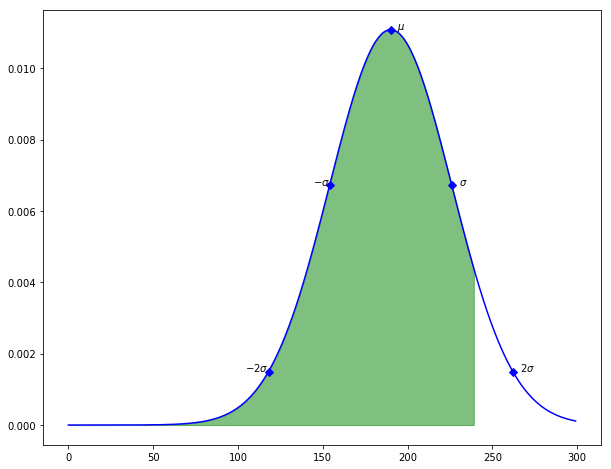

0.9175667301260455

In [92]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

%pylab inline
pylab.rcParams['figure.figsize'] = (10, 8)

## points under study
xi = 240
mean_face = 190
std_face = 36
axis_x = range(0,300)

## return the cumulative value from Z-Table
cdf = stats.norm.cdf(240, mean_face, std_face)

## -2std, -std, std, 2std 
minus2std = mean_face - 2*std_face
minusstd = mean_face - std_face
plus1std = mean_face + std_face
plus2std = mean_face + 2*std_face

## mark points in the plot
markers_points = [minus2std, minusstd, mean_face, plus1std, plus2std]

## find the probability distribution function
pdf = stats.norm.pdf(axis_x,mean_face,std_face)


## - line, b -blue, D - diamond
plt.plot(axis_x, pdf, '-bD',markevery=markers_points)
plt.annotate('$\mu$',xy=(mean_face+4,pdf[mean_face]))
plt.annotate('$-2\sigma$',xy=(minus2std-14,pdf[minus2std]))
plt.annotate('$-\sigma$',xy=(minusstd-10,pdf[minusstd]))
plt.annotate('$\sigma$',xy=(plus1std+4,pdf[plus1std]))
plt.annotate('$2\sigma$',xy=(plus2std+4,pdf[plus2std]))

## The shaded area is cdf at xi, in other words, cdf[240] = 0.9175667301260455
plt.fill_between(axis_x[0:xi], pdf[0:xi],color='g',alpha=.5)

plt.show()

cdf


In [ ]:

geolocator = Nominatim()
location = geolocator.geocode("Brasil")
print(location.address)

In [ ]:
print(df["status.disciplina"])